# Original CapsNet Model Train

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
from utils import Dataset, plotHistory
from models import CapsNet

Setup GPU for training.

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

Define the model name to use and the number of routing iterations

In [4]:
model_name = 'PATCH_CAMELYON' 
n_routing = 3

## 1.0 Import the Dataset
All the model hyperparameters are stored in config.json

In [5]:
dataset = Dataset(model_name, config_path='config.json') 

[INFO] Dataset loaded!


## 2.0 Load the Model

In [6]:
model_train = CapsNet(model_name, mode='train', verbose=True, n_routing=n_routing)

Model: "Original_CapsNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 40, 40, 256)  62464       input_4[0][0]                    
__________________________________________________________________________________________________
primary_caps (PrimaryCaps)      (None, 16, 16, 32, 8 5308672     conv2d[0][0]                     
__________________________________________________________________________________________________
digit_caps (DigitCaps)          (None, 2, 16)        2097184     primary_caps[0][0]               
___________________________________________________________________________________

## 3.0 Train the Model
The number of epochs are in config.json

In [7]:
history = model_train.train(dataset, initial_epoch=0)

------------------------------PATCH_CAMELYON train------------------------------
Epoch 1/50
8192/8192 [==============================] - 620s 75ms/step - loss: 0.5663 - Original_CapsNet_loss: 0.2126 - Generator_loss: 0.9022 - Original_CapsNet_accuracy: 0.7023 - Generator_accuracy: 0.7830 - val_loss: 0.4784 - val_Original_CapsNet_loss: 0.1278 - val_Generator_loss: 0.8943 - val_Original_CapsNet_accuracy: 0.7903 - val_Generator_accuracy: 0.8277

Epoch 00001: val_Original_CapsNet_accuracy improved from -inf to 0.79031, saving model to bin/original_capsnet_PATCH_CAMELYON_new_train.h5
Epoch 2/50
8192/8192 [==============================] - 612s 75ms/step - loss: 0.4734 - Original_CapsNet_loss: 0.1288 - Generator_loss: 0.8791 - Original_CapsNet_accuracy: 0.7992 - Generator_accuracy: 0.8192 - val_loss: 0.4860 - val_Original_CapsNet_loss: 0.1376 - val_Generator_loss: 0.8886 - val_Original_CapsNet_accuracy: 0.7888 - val_Generator_accuracy: 0.8214

Epoch 00002: val_Original_CapsNet_accuracy did n

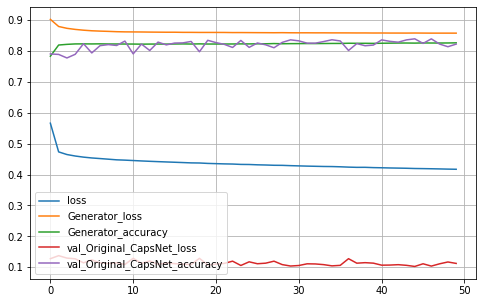

In [8]:
plotHistory(history)